# Continuous Control

### 1. Start the Environment

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```
I have already downloded the unity enviroment and place it same location as this file, once donde that you can access trough:

In [2]:
env = UnityEnvironment(file_name='Reacher_Linux/Reacher.x86')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [6]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

The cell below is just to give you an idea on how to make steps

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

In [6]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.0


When finished, you can close the environment.

In [9]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

# My implementation
## Actor Critic Algorithms
For infinite input space and infinite output space. Compared to Deep-Q that only allows a finite number of inputs, we have chosen Deep Deterministic Policy Gradient.
#### Deep Deterministic Policy Gradient
Used for continous action space, we have added noise to the process just like the authors did [Lillicrap et al, 2015](https://arxiv.org/pdf/1509.02971.pdf).

### Use two separate models
* One outputs the desire action in the continous space
* Other an action to produce Q-values

#### Actor Critic Methods is about having two models:
Actor  takes current enviroment state and determines the best action to take from there. Critic takes in state and action and return score of how good the action is.

#### Here is the code for Actor and Critic Network:
Same architecture for both Agent and Critic with 2 fully connected layers of 400 and 300 units respectively, where values are normalized each batch. Activations are RELU on the first two layers for both Networks and then Tanh and no acytivation function respectively.

#### Hyperparameters
* fc1_units=400 
* fc2_units=300 
* BUFFER_SIZE = 100000  
* BATCH_SIZE = 64     
* GAMMA = 0.9          
* TAU = 1e-4             
* lr_actor = 1e-4        
* lr_critic = 1e-4       
* WEIGHT_DECAY = 0       
* LEARN_EVERY = 20       
* learning_num = 10      
* GRAD_CLIPPING = 1.0    
* ou_sigma = 0.2
* ou_theta = 0.15
* EPSILON = 1.0  
* EPSILON_DECAY = 1e-6

In [11]:
! cat model.py

import numpy as np
import torch 
import torch.nn as nn
import torch.nn.functional as F

class Actor(nn.Module):
    """Actor"""
    
    def __init__(self, state_size, action_size, seed, fc1_units=400, fc2_units=300):
        """
        Using two fully connected layers with 400 and 300 units respectively. Not resetting parameters.
        """
        super(Actor, self).__init__()
        #use for 
        self.seed = torch.manual_seed(seed)
        #for fully connected layer input
        self.fc1 = nn.Linear(state_size, fc1_units)
        #Applying batch normalization
        self.bn1 = nn.BatchNorm1d(fc1_units)
        #fully connected layers
        self.fc2 = nn.Linear(fc1_units, fc2_units)
        self.fc3 =  nn.Linear(fc2_units, action_size)
        
    def forward(self, state):
        """Actor policy network to map states to actions, using relus and tahn"""
        x = F.relu(self.bn1(self.fc1(state)))
        x = F.relu(self.fc2(x))
        return torch.tanh(self.fc3(x))
   

In [2]:
! cat agent.py

from collections import namedtuple, deque
import torch
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import random
from model import Actor, Critic
import copy

BUFFER_SIZE = 100000  # replay buffer
BATCH_SIZE = 64       # batch size: fixed batch per pass
GAMMA = 0.9           # discount factor
TAU = 1e-4             # for soft update: Not update at once but frequently https://arxiv.org/pdf/1509.02971.pdf
lr_actor = 1e-4        # learning rate actor
lr_critic = 1e-4       # learning rate critic
WEIGHT_DECAY = 0       # L2 weight decay

LEARN_EVERY = 20       # learning timestep interval
learning_num = 10         # number of learning passes
GRAD_CLIPPING = 1.0    # gradient clipping 

# Ornstein-Uhlenbeck: Stochastic stationary Gauss-Markov process
ou_sigma = 0.2
ou_theta = 0.15

EPSILON = 1.0  
EPSILON_DECAY = 1e-6

#gpu if possible
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

class Agent():
    
    def __init__(self, state_s

In [7]:
import numpy as np
import random
import time
import torch

#for training performance
import matplotlib.pyplot as plt
%matplotlib inline

from collections import deque
from agent import Agent
from unityagents import UnityEnvironment

In [8]:
def ddpg(actor_weights_name, critic_weights_name, num_episodes=1500, max_t=1000, print_every=25):
    """Deep Deterministic Policy Gradient
    """
    #empty list for score storing
    mean_scores = [] 
    #empty list for moving average
    moving_avgs = [] 
    best_score = -np.inf
    scores_window = deque(maxlen=100) 
    #iterate over number of episodes defined
    for episode in range(1, num_episodes + 1):
        #reset enviroment
        env_info = env.reset(train_mode=True)[brain_name] 
        #state of observations
        states = env_info.vector_observations 
        #set score to zero to number of agents
        scores = np.zeros(num_agents)
        #from agent script: reset
        agent.reset()
        #keep track of time
        start_time = time.time()
        for t in range(max_t):
            #pick according to state
            actions = agent.act(states) 
            #make decision according to actions
            env_info = env.step(actions)[brain_name]  
            next_states = env_info.vector_observations 
            #get rewards
            rewards = env_info.rewards 
            #check for finished episode
            dones = env_info.local_done 
            #learn (from agent fucntion)
            for state, action, reward, next_state, done in zip(states, actions, rewards, next_states, dones):
                agent.step(state, action, reward, next_state, done, t)
            states = next_states
            scores += rewards
            #when done break
            if np.any(dones):
                break
        end_time = time.time()
        duration = end_time - start_time
        #append mean score
        mean_scores.append(np.mean(scores)) 
        scores_window.append(mean_scores[-1]) 
        moving_avgs.append(np.mean(scores_window))
        
        if episode % print_every == 0:
            print("\rEpisode {} ({}s)\tMean: {:.1f}\tMoving Avg: {:.1f}"\
                  .format(episode, round(duration), mean_scores[-1], moving_avgs[-1]))
        if moving_avgs[-1] >= 30.0:
            print("\nEnvironment solved in {:d} episodes.\tAverage score: {:.2f}"\
                 .format(episode, moving_avgs[-1]))
            torch.save(agent.actor_local.state_dict(), actor_weights_name)
            torch.save(agent.critic_local.state_dict(), critic_weights_name)
            break
            
    return(mean_scores, moving_avgs)

In [9]:
agent = Agent(state_size=state_size, action_size=action_size, seed=12)

In [10]:
scores, avgs = ddpg(actor_weights_name ='actor_single.pth', critic_weights_name='critic_single.pth', print_every=50)

Episode 50 (10s)	Mean: 0.5	Moving Avg: 1.0
Episode 100 (12s)	Mean: 0.1	Moving Avg: 0.7
Episode 150 (12s)	Mean: 0.4	Moving Avg: 0.3
Episode 200 (13s)	Mean: 0.0	Moving Avg: 0.3
Episode 250 (10s)	Mean: 0.2	Moving Avg: 0.7
Episode 300 (10s)	Mean: 2.0	Moving Avg: 1.3
Episode 350 (10s)	Mean: 1.1	Moving Avg: 1.6
Episode 400 (13s)	Mean: 3.9	Moving Avg: 2.1
Episode 450 (10s)	Mean: 5.5	Moving Avg: 2.9
Episode 500 (10s)	Mean: 3.8	Moving Avg: 3.8
Episode 550 (10s)	Mean: 12.2	Moving Avg: 6.2
Episode 600 (10s)	Mean: 17.9	Moving Avg: 11.3
Episode 650 (11s)	Mean: 23.0	Moving Avg: 16.8
Episode 700 (14s)	Mean: 26.5	Moving Avg: 20.5
Episode 750 (12s)	Mean: 33.8	Moving Avg: 24.2
Episode 800 (10s)	Mean: 37.7	Moving Avg: 29.1

Environment solved in 810 episodes.	Average score: 30.03


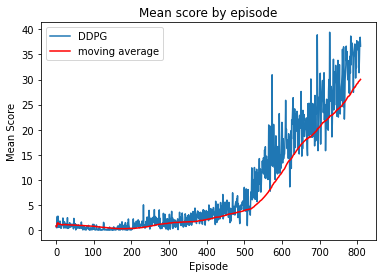

In [14]:
plt.plot(np.arange(len(scores)), scores, label='DDPG')
plt.plot(np.arange(len(scores)), avgs, c='r', label='moving average')
plt.title("Mean score by episode")
plt.ylabel('Mean Score')
plt.xlabel('Episode')
plt.legend(loc='upper left')
plt.show()

In [15]:
env.close()

## Future Work:
* Even though Gamma value pretty high, we might be able to increase a little bit more.
* Decresing the learning interval or increasing the steps when learning might yield to faster results, also changing the Actor and Critic architecture.
* Finally by adding prioritized experience replay as [(Hou & Zhang, 2017)](https://cardwing.github.io/files/RL_course_report.pdf).